# Machine Leaning Project

## Topic:	Standard of living

### Q 1.	How people feel about the household income, either they are comfortable or difficult to live with current income?

### Q 2.	Considering the other factor, to what extant people are satisfied with the life?


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


In [2]:
df = pd.read_csv('ESS11-subset.csv')
print(df.shape)
df

(1771, 42)


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,emplrel,wrkctra,jbspv,wkhtot,uemp12m,hinctnta,hincfel,prob,stratum,psu
0,ESS11e02,11,2.0,20.11.2024,50014,FR,1.010005,1.053318,3.184377,3.354163,...,1,1,1,50,6,8,2,0.000121,617,6409
1,ESS11e02,11,2.0,20.11.2024,50047,FR,0.991407,3.267433,3.184377,10.404737,...,1,1,1,50,6,6,2,0.000123,617,6393
2,ESS11e02,11,2.0,20.11.2024,50131,FR,1.004306,0.678151,3.184377,2.159489,...,1,1,2,33,6,8,1,0.000122,620,6217
3,ESS11e02,11,2.0,20.11.2024,50152,FR,1.004392,1.473851,3.184377,4.693297,...,1,1,2,46,6,5,3,0.000122,635,6370
4,ESS11e02,11,2.0,20.11.2024,50160,FR,1.001768,0.664462,3.184377,2.115897,...,1,1,2,39,6,8,1,0.000122,628,6267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1766,ESS11e02,11,2.0,20.11.2024,86354,FR,0.996633,0.749378,3.184377,2.386302,...,1,1,2,39,6,77,2,0.000123,633,6203
1767,ESS11e02,11,2.0,20.11.2024,86368,FR,1.000603,1.144633,3.184377,3.644942,...,1,1,1,38,6,9,1,0.000122,635,6187
1768,ESS11e02,11,2.0,20.11.2024,86398,FR,1.001961,1.399854,3.184377,4.457663,...,1,1,2,36,6,7,1,0.000122,634,6230
1769,ESS11e02,11,2.0,20.11.2024,86416,FR,1.007522,1.157386,3.184377,3.685554,...,1,2,2,40,2,9,1,0.000121,617,6360


In [3]:
df.isna().sum()

name        0
essround    0
edition     0
proddate    0
idno        0
cntry       0
dweight     0
pspwght     0
pweight     0
anweight    0
pplhlp      0
trstlgl     0
trstplt     0
vote        0
stflife     0
stfeco      0
stfgov      0
stfedu      0
stfhlth     0
imsmetn     0
happy       0
health      0
hlthhmp     0
rlgblg      0
hhmmb       0
gndr        0
agea        0
rshpsts     0
domicil     0
edulvlb     0
eduyrs      0
pdwrk       0
emplrel     0
wrkctra     0
jbspv       0
wkhtot      0
uemp12m     0
hinctnta    0
hincfel     0
prob        0
stratum     0
psu         0
dtype: int64

In [4]:
df.count()

name        1771
essround    1771
edition     1771
proddate    1771
idno        1771
cntry       1771
dweight     1771
pspwght     1771
pweight     1771
anweight    1771
pplhlp      1771
trstlgl     1771
trstplt     1771
vote        1771
stflife     1771
stfeco      1771
stfgov      1771
stfedu      1771
stfhlth     1771
imsmetn     1771
happy       1771
health      1771
hlthhmp     1771
rlgblg      1771
hhmmb       1771
gndr        1771
agea        1771
rshpsts     1771
domicil     1771
edulvlb     1771
eduyrs      1771
pdwrk       1771
emplrel     1771
wrkctra     1771
jbspv       1771
wkhtot      1771
uemp12m     1771
hinctnta    1771
hincfel     1771
prob        1771
stratum     1771
psu         1771
dtype: int64

In [5]:
# Droping irrelevant columns (i.e. identification and weighting columns and prob).

df = df.drop(columns=["name", "essround", "edition", "proddate", "idno", "cntry", "dweight", "pspwght", "pweight", "anweight", "prob", "stratum", "psu"])
df.head()


,pplhlp,trstlgl,trstplt,vote,stflife,stfeco,stfgov,stfedu,stfhlth,imsmetn,...,edulvlb,eduyrs,pdwrk,emplrel,wrkctra,jbspv,wkhtot,uemp12m,hinctnta,hincfel
0,2,7,5,1,7,4,2,2,3,2,...,720,17,1,1,1,1,50,6,8,2
1,5,5,4,1,8,7,6,5,6,2,...,213,12,1,1,1,1,50,6,6,2
2,2,7,3,2,7,4,5,3,3,2,...,520,15,1,1,1,2,33,6,8,1
3,4,6,0,3,4,5,3,7,6,2,...,113,5,0,1,1,2,46,6,5,3
4,6,8,3,2,8,4,5,7,8,2,...,620,15,1,1,1,2,39,6,8,1


In [6]:
# checking the exact number of columns
print(df.shape)
print(len(df.columns.values))
df.columns.values

(1771, 29)
29


array(['pplhlp', 'trstlgl', 'trstplt', 'vote', 'stflife', 'stfeco',
       'stfgov', 'stfedu', 'stfhlth', 'imsmetn', 'happy', 'health',
       'hlthhmp', 'rlgblg', 'hhmmb', 'gndr', 'agea', 'rshpsts', 'domicil',
       'edulvlb', 'eduyrs', 'pdwrk', 'emplrel', 'wrkctra', 'jbspv',
       'wkhtot', 'uemp12m', 'hinctnta', 'hincfel'], dtype=object)

In [7]:
# dependent variable
['hincfel'] # ordinal variable
['stflife'] # ordinal variable

# independent variables
Numeric_variables = ["eduyrs", 'wkhtot', 'hhmmb', 'agea' ]
Ord_variables = [
  "domicil",  # 1–5 (7, 8, 9)
  "health",   # 1–5 (7, 8, 9)
  "hlthhmp",  # 1-3 (7, 8, 9)
  "wrkctra",  # 1–3 (6, 7, 8, 9)
  "happy",    # 0–10 (77, 88, 99)
  "trstlgl",  # 0–10 (77, 88, 99)
  "stfgov",   # 0–10 (77, 88, 99)
  "stfhlth",  # 1–10 (77, 88, 99)
]
Nominal_var =[
    "vote",     # 1–3 (7, 8, 9)
    "rlgblg",   # 1–2 (7, 8, 9)
    "emplrel",  # 1–3 (6, 7, 8, 9)
    "gndr",     # 1–2 ( 9)
]

In [8]:

for col in df.columns:
    if col not in ("eduyrs", 'wkhtot', 'hhmmb', 'agea', "uemp12m", 'wrkctra', 'domicil', 'happy', 'health', 'hlthhmp', 'trstlgl', 'stfhlth', 'vote', 
                'rlgblg', 'stfgov', 'emplrel', 'hincfel', 'stflife'):
        count = 0
        for val in df[col]:
            if val > 10:
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")

    elif col in ('hincfel', 'domicil', 'hlthhmp', 'health', 'vote', 'rlgblg'):
        count = 0
        for val in df[col]:
            if val in (7, 8, 9):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")

    elif col in ('uemp12m', 'wrkctra', 'emplrel'):
        count = 0
        for val in df[col]:
            if val in (6, 7, 8, 9):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")

    elif col in ('stflife', 'eduyrs','hhmmb','happy', 'trstlgl', 'stfhlth', 'stfgov'):
        count = 0
        for val in df[col]:
            if val in (77, 88, 99):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")

    elif col in ('wkhtot'):
        count = 0
        for val in df[col]:
            if val in (666, 777, 888, 999):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")

    elif col in ('agea'):
        count = 0
        for val in df[col]:
            if val in (888, 999):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")


pplhlp 0.28%
trstlgl 0.4%
trstplt 1.02%
vote 1.81%
stflife 1.86%
stfeco 2.82%
stfgov 2.88%
stfedu 2.09%
stfhlth 0.73%
imsmetn 0.0%
happy 0.23%
health 0.28%
hlthhmp 0.0%
rlgblg 0.73%
hhmmb 0.4%
gndr 0.0%
agea 0.17%
rshpsts 38.74%
domicil 0.11%
edulvlb 99.55%
eduyrs 0.06%
pdwrk 0.0%
emplrel 8.3%
wrkctra 18.52%
jbspv 0.0%
wkhtot 11.01%
uemp12m 65.33%
hinctnta 10.84%
hincfel 1.02%


In [9]:
df[['eduyrs']].value_counts().sort_index()

eduyrs
0           3
1           3
2           1
3           2
4           1
5          53
6           7
7          14
8          35
9         139
10         69
11        136
12        373
13        106
14        187
15        205
16         95
17        192
18         56
19         33
20         54
22          1
23          3
24          1
26          1
88          1
Name: count, dtype: int64

In [10]:
# uemp12m contain large number of missing values (i.e. 65.33%)
# therefore will not consider this variable for the analysis

 
# ------------------------------------------------filling the mising values with mode------------------------------------------
# 6, 7, 8, 9
one_digit_non_valid = [
    'hincfel', 'domicil', 'hlthhmp', 'health', 'wrkctra']

# 77, 88, 99
two_digit_non_valid = [
    'stflife', 'happy', 'trstlgl', 'stfhlth', 'stfgov'
]

for var in one_digit_non_valid:
  df[var] = df[var].replace([6, 7, 8, 9], df[var].mode()[0])
for var in two_digit_non_valid:
  df[var] = df[var].replace([77, 88, 99], df[var].mode()[0])

# verifying that there are no more non‐valid values
print(df.shape)
for col in df.columns:
  if col in one_digit_non_valid:
    count = 0
    if val in (7, 8, 9):
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")

  elif col in two_digit_non_valid:
    count = 0
    for val in df[col]:
      if val > 10:
        count += 1
    pct_novalid = count / len(df[col])
    print(col, f"{round(pct_novalid * 100, 2)}%")


(1771, 29)
trstlgl 0.0%
stflife 0.0%
stfgov 0.0%
stfhlth 0.0%
happy 0.0%
health 0.06%
hlthhmp 0.06%
domicil 0.06%
wrkctra 0.06%
hincfel 0.06%


In [11]:
Nominal_var1 =["vote"]
Nominal_var2 =["rlgblg"]
Nominal_var3 = ['emplrel']
Nominal_var4 = ['gndr']

# Value of vote 3 = Not eligible, So i have also filled this value with mode
# Now we have 1 = Yes, 2 = No
for var in Nominal_var1:
  df[var] = df[var].replace([3, 7, 8, 9], df[var].mode()[0])
for var in Nominal_var2:
  df[var] = df[var].replace([7, 8, 9], df[var].mode()[0])
for var in Nominal_var3:
  df[var] = df[var].replace([6, 7, 8, 9], df[var].mode()[0])
for var in Nominal_var4:
  df[var] = df[var].replace([8, 9], df[var].mode()[0])


for col in df.columns:
    if col in Nominal_var1:
        count = 0
        for val in df[col]:
            if val in (3, 7, 8, 9):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")
    elif col in Nominal_var2:
        count = 0
        for val in df[col]:
            if val in (7, 8, 9):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")

    elif col in Nominal_var3:
        count = 0
        for val in df[col]:
            if val in (6, 7, 8, 9):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")
       
    elif col in Nominal_var4:
        count = 0
        for val in df[col]:
            if val in ( 8, 9):
                count += 1
        pct_novalid = count / len(df[col])
        print(col, f"{round(pct_novalid * 100, 2)}%")
       

vote 0.0%
rlgblg 0.0%
gndr 0.0%
emplrel 0.0%


In [12]:
X_numeric = df[["eduyrs", 'wkhtot', 'hhmmb', 'agea' ]]

X_numeric_cleaned = X_numeric.replace({
    'eduyrs': [77, 88, 99],
    'wkhtot': [666, 777, 888, 999],
    'hhmmb': [77, 88, 99],
    'agea': [999]
}, np.nan)

# Impute NaN values with the mean of each column
X_numeric_cleaned = X_numeric_cleaned.fillna(X_numeric_cleaned.mean())

# Updating the original DataFrame `df` with the cleaned data
df[["eduyrs", 'wkhtot', 'hhmmb', 'agea']] = X_numeric_cleaned

# Step 4: Inspect the cleaned data
print("Shape before cleaning:", X_numeric.shape)
print("Shape after cleaning:", X_numeric_cleaned.shape)
print("\nSample of cleaned data:")
print(X_numeric_cleaned.head())

Shape before cleaning: (1771, 4)
Shape after cleaning: (1771, 4)

Sample of cleaned data:
   eduyrs  wkhtot  hhmmb  agea
0    17.0    50.0    2.0  48.0
1    12.0    50.0    2.0  54.0
2    15.0    33.0    5.0  38.0
3     5.0    46.0    2.0  68.0
4    15.0    39.0    4.0  37.0


array([[<Axes: title={'center': 'eduyrs'}>,
        <Axes: title={'center': 'wkhtot'}>],
       [<Axes: title={'center': 'hhmmb'}>,
        <Axes: title={'center': 'agea'}>]], dtype=object)

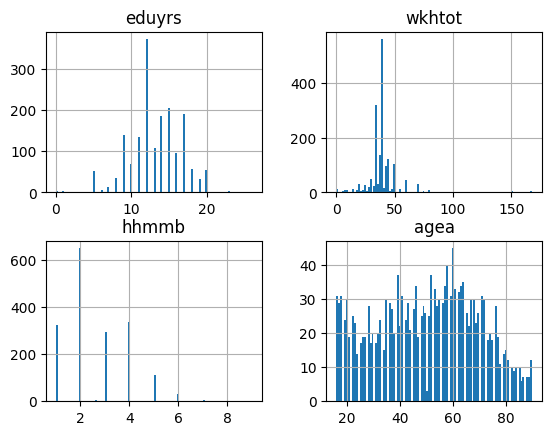

In [13]:
# histogram of the cleaned numeric variables
X_numeric_cleaned.hist(bins=100)

# Creting Dummies

In [14]:

nomnl_var =[
    "vote", "rlgblg", "emplrel", "gndr"
]

# Create dummy variables using pd.get_dummies()
# drop_first=True to avoid multicollinearity by dropping the first category
dummy_df = pd.get_dummies(df[nomnl_var], 
                          columns=nomnl_var, 
                          drop_first=True, 
                          prefix=nomnl_var, 
                          prefix_sep='_')

print(dummy_df.columns.values)
dummy_df.head()

['vote_2' 'rlgblg_2' 'emplrel_2' 'emplrel_3' 'gndr_2']


,vote_2,rlgblg_2,emplrel_2,emplrel_3,gndr_2
0,False,True,False,False,False
1,False,False,False,False,True
2,True,False,False,False,True
3,False,False,False,False,True
4,True,True,False,False,False


In [15]:
# Converting the nominal variables to boolean (0/1) for logistic regression
dummy_df = dummy_df.astype(int)
dummy_df.head()

,vote_2,rlgblg_2,emplrel_2,emplrel_3,gndr_2
0,0,1,0,0,0
1,0,0,0,0,1
2,1,0,0,0,1
3,0,0,0,0,1
4,1,1,0,0,0


In [16]:
# Droping the original categorical columns from df and merge the dummies
# gender 0 = Male, 1 = Female
df = df.drop(columns=['vote', 'rlgblg', 'emplrel', 'gndr'])  # Drop original categorical columns
df = pd.concat([df, dummy_df], axis=1)  # Add dummy columns
df.columns.values

array(['pplhlp', 'trstlgl', 'trstplt', 'stflife', 'stfeco', 'stfgov',
       'stfedu', 'stfhlth', 'imsmetn', 'happy', 'health', 'hlthhmp',
       'hhmmb', 'agea', 'rshpsts', 'domicil', 'edulvlb', 'eduyrs',
       'pdwrk', 'wrkctra', 'jbspv', 'wkhtot', 'uemp12m', 'hinctnta',
       'hincfel', 'vote_2', 'rlgblg_2', 'emplrel_2', 'emplrel_3',
       'gndr_2'], dtype=object)

In [17]:
# considering only the variable of interest, droping others...
df = df.drop(columns=['pplhlp', 'trstplt', 'stfeco', 'imsmetn', 'rshpsts', 'edulvlb', 'pdwrk','jbspv','uemp12m','hinctnta'])
df.head()

,trstlgl,stflife,stfgov,stfedu,stfhlth,happy,health,hlthhmp,hhmmb,agea,domicil,eduyrs,wrkctra,wkhtot,hincfel,vote_2,rlgblg_2,emplrel_2,emplrel_3,gndr_2
0,7,7,2,2,3,6,2,3,2.0,48.0,1,17.0,1,50.0,2,0,1,0,0,0
1,5,8,6,5,6,8,4,2,2.0,54.0,1,12.0,1,50.0,2,0,0,0,0,1
2,7,7,5,3,3,8,1,3,5.0,38.0,4,15.0,1,33.0,1,1,0,0,0,1
3,6,4,3,7,6,7,2,3,2.0,68.0,4,5.0,1,46.0,3,0,0,0,0,1
4,8,8,5,7,8,9,1,2,4.0,37.0,3,15.0,1,39.0,1,1,1,0,0,0


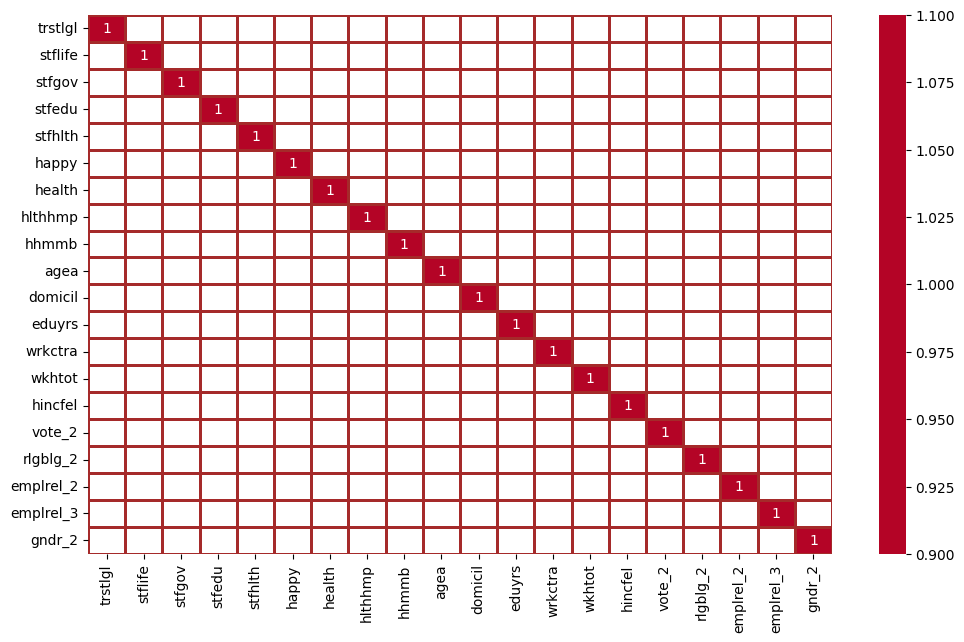

In [18]:
# testing multicollinearity between variables.
corr = df.corr()

mask = corr <= 0.80 # This is to avoid showing the ones that have more than 0.80 correlation.

plt.figure(figsize=(12,7))
sns.heatmap(corr,
            annot = True,
            mask = mask,
            fmt = ".1g",
            center = 0,
            cmap = "coolwarm",
            linewidth = 1,
            linecolor = "brown")
plt.show()

# Estimation with first dependent variable

In [19]:
# Create binary for dependent variable
# 0–5 → 0 (dissatisfied) ------------  6–10 → 1 (satisfied)
df["stflife"] = np.where(df["stflife"] <= 5, 0, 1)

In [20]:

y_1 = df['stflife']  # Dependent variable
# create a list of independent variables contains all the variables in the df except the dependent variable
X = df.drop(columns=['stflife', 'hincfel'])  # Independent variables
X = sm.add_constant(X)

X.head()

,const,trstlgl,stfgov,stfedu,stfhlth,happy,health,hlthhmp,hhmmb,agea,domicil,eduyrs,wrkctra,wkhtot,vote_2,rlgblg_2,emplrel_2,emplrel_3,gndr_2
0,1.0,7,2,2,3,6,2,3,2.0,48.0,1,17.0,1,50.0,0,1,0,0,0
1,1.0,5,6,5,6,8,4,2,2.0,54.0,1,12.0,1,50.0,0,0,0,0,1
2,1.0,7,5,3,3,8,1,3,5.0,38.0,4,15.0,1,33.0,1,0,0,0,1
3,1.0,6,3,7,6,7,2,3,2.0,68.0,4,5.0,1,46.0,0,0,0,0,1
4,1.0,8,5,7,8,9,1,2,4.0,37.0,3,15.0,1,39.0,1,1,0,0,0


In [21]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

# Logit Regression.

logit_model = sm.Logit(y_train, X_train)
result_1 = logit_model.fit()
print(result_1.summary())

Optimization terminated successfully.
         Current function value: 0.399235
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                stflife   No. Observations:                 1416
Model:                          Logit   Df Residuals:                     1397
Method:                           MLE   Df Model:                           18
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.2871
Time:                        13:01:27   Log-Likelihood:                -565.32
converged:                       True   LL-Null:                       -792.95
Covariance Type:            nonrobust   LLR p-value:                 2.551e-85
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8828      0.974     -6.040      0.000      -7.792      -3.974
trstlgl        0.0491      0.

In [22]:
# Checking which variables have statistical significance and which don't.
#  This could be used later for creating a model that doesn't use the ones that are non-statistically significant.

pvals = result_1.pvalues.drop('const', errors='ignore')

# Choose your α‐level
alpha = 0.05

# Build two lists
significant_vars    = pvals.index[pvals < alpha].tolist()
insignificant_vars  = pvals.index[pvals >= alpha].tolist()

# Display
print("Significant (p < {:.2f}):".format(alpha), significant_vars)
print("Not significant (p ≥ {:.2f}):".format(alpha), insignificant_vars)

Significant (p < 0.05): ['stfgov', 'happy', 'eduyrs', 'gndr_2']
Not significant (p ≥ 0.05): ['trstlgl', 'stfedu', 'stfhlth', 'health', 'hlthhmp', 'hhmmb', 'agea', 'domicil', 'wrkctra', 'wkhtot', 'vote_2', 'rlgblg_2', 'emplrel_2', 'emplrel_3']


Predictions on the test set (binary):
976    1
275    1
411    1
964    1
518    1
dtype: int64


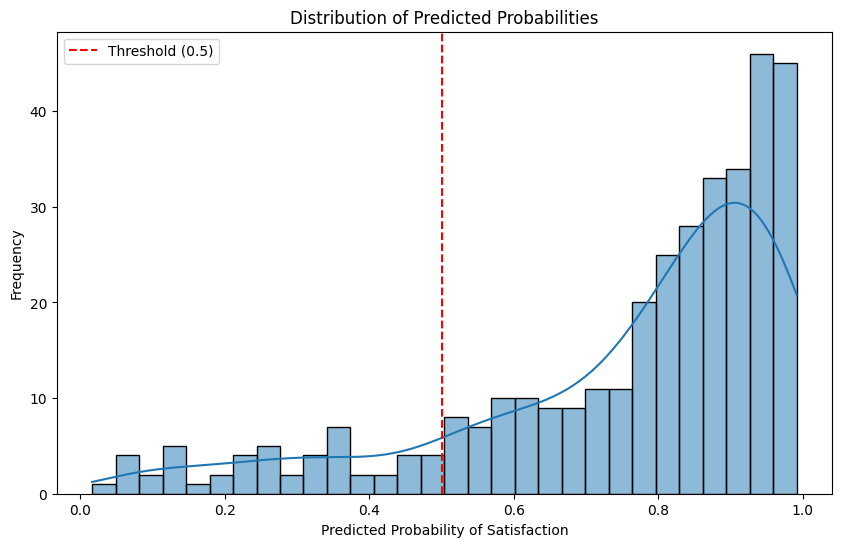

In [23]:
# Predicting the test set results (probabilities)
y_pred_proba_1 = result_1.predict(X_test)

# Convert probabilities to binary outcomes
y_pred_1 = (y_pred_proba_1 >= 0.5).astype(int)

# Print the first few predictions
print("Predictions on the test set (binary):")
print(y_pred_1.head())

# Visualizing the predicted probabilities (before binarization)
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba_1, bins=30, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Satisfaction')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.show()

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        92
           1       0.81      0.94      0.87       263

    accuracy                           0.79       355
   macro avg       0.74      0.65      0.67       355
weighted avg       0.77      0.79      0.76       355



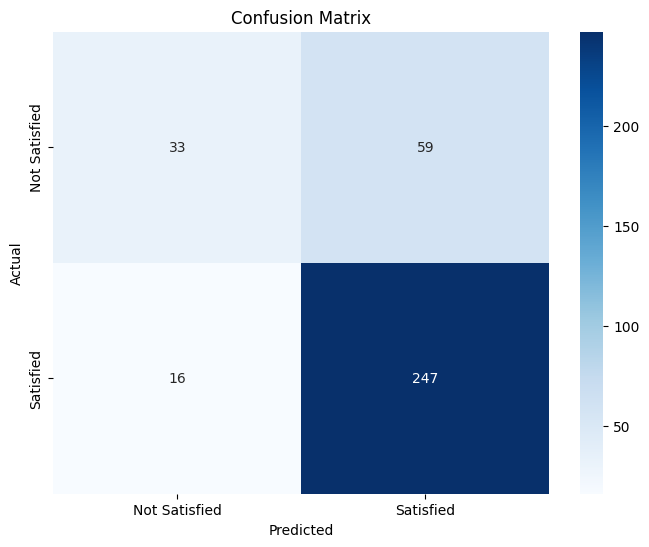

In [24]:

# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy:.2f}")
# Print classification reportp
print("Classification Report:")
print(classification_report(y_test, y_pred_1))
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
# Manual Checking of Accuracy, Specificity, and Sensitivity.
print(confusion_matrix(y_test, y_pred_1))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_1).ravel()
print("tn={}, fp={}, fn={}, tp={}".format(tn, fp, fn, tp))
# Accuracy.
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy:", round(accuracy * 100, 1), "%")

# Specificity.
specificity = tn / (tn + fp)
print("Specificity:", round(specificity * 100, 1), "%")

# Sensitivity.
sensitivity = tp / (tp + fn)
print("Sensitivity:", round(sensitivity * 100, 1), "%")

[[ 33  59]
 [ 16 247]]
tn=33, fp=59, fn=16, tp=247
Accuracy: 78.9 %
Specificity: 35.9 %
Sensitivity: 93.9 %


# Estimation with second dependent variable

In [26]:
# Create binary variables for the dependent variables
# 1&2 → 1 (comfertable) ------------  3&4 → 0 (Not comfortable)
df["hincfel"] = np.where(df["hincfel"] <= 2, 1, 0)

y_2 = df['hincfel']  # Dependent variable
# create a list of independent variables contains all the variables in the df except the dependent variable
X = df.drop(columns=['stflife', 'hincfel'])  # Independent variables
X = sm.add_constant(X)

X.head()


,const,trstlgl,stfgov,stfedu,stfhlth,happy,health,hlthhmp,hhmmb,agea,domicil,eduyrs,wrkctra,wkhtot,vote_2,rlgblg_2,emplrel_2,emplrel_3,gndr_2
0,1.0,7,2,2,3,6,2,3,2.0,48.0,1,17.0,1,50.0,0,1,0,0,0
1,1.0,5,6,5,6,8,4,2,2.0,54.0,1,12.0,1,50.0,0,0,0,0,1
2,1.0,7,5,3,3,8,1,3,5.0,38.0,4,15.0,1,33.0,1,0,0,0,1
3,1.0,6,3,7,6,7,2,3,2.0,68.0,4,5.0,1,46.0,0,0,0,0,1
4,1.0,8,5,7,8,9,1,2,4.0,37.0,3,15.0,1,39.0,1,1,0,0,0


In [27]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size=0.2, random_state=42)

# Logit Regression.

logit_model = sm.Logit(y_train, X_train)
result_2 = logit_model.fit()
print(result_2.summary())

         Current function value: 0.324864
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                hincfel   No. Observations:                 1416
Model:                          Logit   Df Residuals:                     1397
Method:                           MLE   Df Model:                           18
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.1561
Time:                        13:01:28   Log-Likelihood:                -460.01
converged:                      False   LL-Null:                       -545.07
Covariance Type:            nonrobust   LLR p-value:                 8.587e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8248      1.039     -3.680      0.000      -5.862      -1.787
trstlgl        0.0187      0.037      0.506      0.613      -0.05

C:\Users\Pc Planet\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
# showing the the variable that are statistically significant and insignificant

pvals = result_2.pvalues.drop('const', errors='ignore')

# α‐level
alpha = 0.05

# Build two lists
significant_vars    = pvals.index[pvals < alpha].tolist()
insignificant_vars  = pvals.index[pvals >= alpha].tolist()

# Display
print("Significant (p < {:.2f}):".format(alpha), significant_vars)
print("Not significant (p ≥ {:.2f}):".format(alpha), insignificant_vars)

Significant (p < 0.05): ['stfgov', 'happy', 'hlthhmp', 'agea', 'domicil', 'eduyrs']
Not significant (p ≥ 0.05): ['trstlgl', 'stfedu', 'stfhlth', 'health', 'hhmmb', 'wrkctra', 'wkhtot', 'vote_2', 'rlgblg_2', 'emplrel_2', 'emplrel_3', 'gndr_2']


Predictions on the test set (binary):
976    1
275    1
411    1
964    1
518    1
dtype: int64


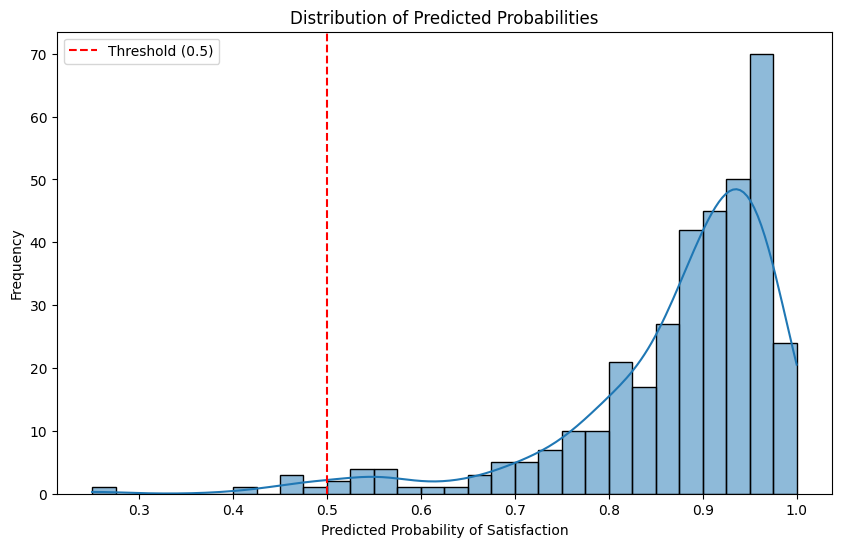

In [29]:

# Predicting the test set results (probabilities)
y_pred_proba_2 = result_2.predict(X_test)

# Convert probabilities to binary outcomes
y_pred_2 = (y_pred_proba_2 >= 0.5).astype(int)

# Print the first few predictions
print("Predictions on the test set (binary):")
print(y_pred_2.head())

# Visualizing the predicted probabilities (before binarization)
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba_2, bins=30, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Satisfaction')
plt.ylabel('Frequency')
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.show()

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.10        53
           1       0.86      0.99      0.92       302

    accuracy                           0.85       355
   macro avg       0.68      0.52      0.51       355
weighted avg       0.80      0.85      0.80       355



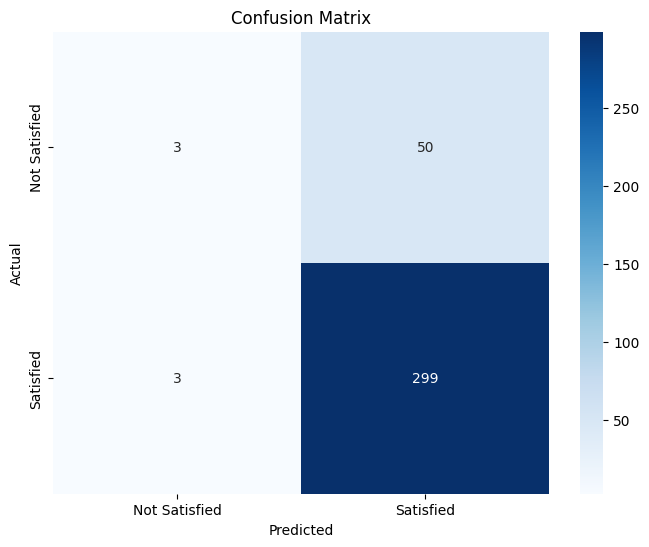

In [30]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy:.2f}")
# Print classification reportp
print("Classification Report:")
print(classification_report(y_test, y_pred_2))
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
# Manual Checking of Accuracy, Specificity, and Sensitivity.
print(confusion_matrix(y_test, y_pred_2))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_2).ravel()
print("tn={}, fp={}, fn={}, tp={}".format(tn, fp, fn, tp))
# Accuracy.
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy:", round(accuracy * 100, 1), "%")

# Specificity.
specificity = tn / (tn + fp)
print("Specificity:", round(specificity * 100, 1), "%")

# Sensitivity.
sensitivity = tp / (tp + fn)
print("Sensitivity:", round(sensitivity * 100, 1), "%")

[[  3  50]
 [  3 299]]
tn=3, fp=50, fn=3, tp=299
Accuracy: 85.1 %
Specificity: 5.7 %
Sensitivity: 99.0 %
